# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [22]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [23]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [24]:
print(f"My rows number is {data.shape[0]}")
print(f"My columns number is {data.shape[1]}")

My rows number is 5391
My columns number is 6


In [25]:
print(f"Is there is a NAN rows? {data.isna().any().any()}")

Is there is a NAN rows? False


In [26]:
print(f"Is there is a duplicated rows? {data.duplicated().any()}")

Is there is a duplicated rows? False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [28]:
data.sample()
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [32]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])
    
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [33]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [48]:
average_production_budget = data['USD_Production_Budget'].mean()
average_worldwide_gross = data['USD_Worldwide_Gross'].mean()

print("Average production budget is:", average_production_budget)
print("Average worldwide gross is:", average_worldwide_gross)

minimum_worldwide_gross = data['USD_Worldwide_Gross'].min()
minimum_domestic_gross = data['USD_Domestic_Gross'].min()

print("Minimum Worldwide Gross Revenue:", minimum_worldwide_gross)
print("Minimum Domestic Gross Revenue:", minimum_domestic_gross)

percentile_25th = np.percentile(data['USD_Worldwide_Gross'], 25)

if percentile_25th > 0:
    print("The bottom 25% of films are profitable.")
else:
    print("The bottom 25% of films are not profitable or incur losses.")
    
highest_production_budget = data['USD_Production_Budget'].max()
highest_worldwide_gross = data['USD_Worldwide_Gross'].max()

print("Highest production budget: $", highest_production_budget)
print("Highest worldwide gross revenue: $", highest_worldwide_gross)

lowest_budget = data['USD_Production_Budget'].min()
lowest_budget_film = data[data['USD_Production_Budget'] == lowest_budget]
lowest_revenue = lowest_budget_film['USD_Worldwide_Gross'].values[0]

highest_budget = data['USD_Production_Budget'].max()
highest_budget_film = data[data['USD_Production_Budget'] == highest_budget]
highest_revenue = highest_budget_film['USD_Worldwide_Gross'].values[0]

print("Lowest budget film revenue: $", lowest_revenue)
print("Highest budget film revenue: $", highest_revenue)

Average production budget is: 31113737.57837136
Average worldwide gross is: 88855421.96271564
Minimum Worldwide Gross Revenue: 0
Minimum Domestic Gross Revenue: 0
The bottom 25% of films are profitable.
Highest production budget: $ 425000000
Highest worldwide gross revenue: $ 2783918982
Lowest budget film revenue: $ 181041
Highest budget film revenue: $ 2783918982


In [49]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [52]:
zero_domestic_gross_films = data[data['USD_Domestic_Gross'] == 0]
num_zero_domestic_gross_films = len(zero_domestic_gross_films)
highest_budget_films_no_gross = zero_domestic_gross_films.sort_values('USD_Production_Budget', ascending=False)

print("Number of films with $0 domestic gross: ", num_zero_domestic_gross_films)
print(highest_budget_films_no_gross[['Movie_Title', 'USD_Production_Budget']])

Number of films with $0 domestic gross:  512
                             Movie_Title  USD_Production_Budget
5388                         Singularity              175000000
5387                             Aquaman              160000000
5384                   A Wrinkle in Time              103000000
5385                      Amusement Park              100000000
5090  Don Gato, el inicio de la pandilla               80000000
...                                  ...                    ...
4787                Stories of Our Lives                  15000
3056                         Tin Can Man                  12000
4907                    Family Motocross                  10000
5006             Signed Sealed Delivered                   5000
5007                A Plague So Pleasant                   1400

[512 rows x 2 columns]


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [55]:
zero_worldwide_gross_films = data[data['USD_Worldwide_Gross'] == 0]
num_films_zero_gross_worldwide = len(zero_worldwide_gross_films)
highest_budget_films_no_revenue = zero_worldwide_gross_films.sort_values('USD_Production_Budget', ascending=False)

print("Number of films with $0 worldwide gross:", num_films_zero_gross_worldwide)
print("Highest budget films with no revenue internationally:")
print(highest_budget_films_no_revenue.head())

Number of films with $0 worldwide gross: 357
Highest budget films with no revenue internationally:
      Rank Release_Date        Movie_Title  USD_Production_Budget   
5388    96   2020-12-31        Singularity              175000000  \
5387   126   2018-12-18            Aquaman              160000000   
5384   321   2018-09-03  A Wrinkle in Time              103000000   
5385   366   2018-10-08     Amusement Park              100000000   
5058   880   2015-11-12   The Ridiculous 6               60000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  


### Filtering on Multiple Conditions

In [59]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(international_releases)

      Rank Release_Date              Movie_Title  USD_Production_Budget   
71    4310   1956-02-16                 Carousel                3380000  \
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
157

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [60]:
subset = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')

print("International releases with some worldwide gross revenue but zero revenue in the United States:")
print(subset)

International releases with some worldwide gross revenue but zero revenue in the United States:
      Rank Release_Date              Movie_Title  USD_Production_Budget   
71    4310   1956-02-16                 Carousel                3380000  \
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

   

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [71]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

data['Release_Date'] = pd.to_datetime(data['Release_Date'])

subset = data[data['Release_Date'] > scrape_date]

num_films_not_released_yet = len(subset)

print("Films not released yet as of May 1st, 2018:")
print(subset[['Rank', 'Release_Date', 'Movie_Title']])

print("Number of films not yet released:", num_films_not_released_yet)

Films not released yet as of May 1st, 2018:
      Rank Release_Date                     Movie_Title
5384   321   2018-09-03               A Wrinkle in Time
5385   366   2018-10-08                  Amusement Park
5386  2950   2018-10-08                             Meg
5387   126   2018-12-18                         Aquaman
5388    96   2020-12-31                     Singularity
5389  1119   2020-12-31          Hannibal the Conqueror
5390  2517   2020-12-31  Story of Bonnie and Clyde, The
Number of films not yet released: 7


In [72]:
data_clean = data.drop(subset.index)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [73]:
num_films_production_exceeded_gross = len(data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']])
total_films = len(data_clean)
percentage_production_exceeded_gross = (num_films_production_exceeded_gross / total_films) * 100
print(f"Percentage of films where production costs exceeded worldwide gross revenue: {percentage_production_exceeded_gross}%")


Percentage of films where production costs exceeded worldwide gross revenue: 37.27711738484398%


# Seaborn for Data Viz: Bubble Charts

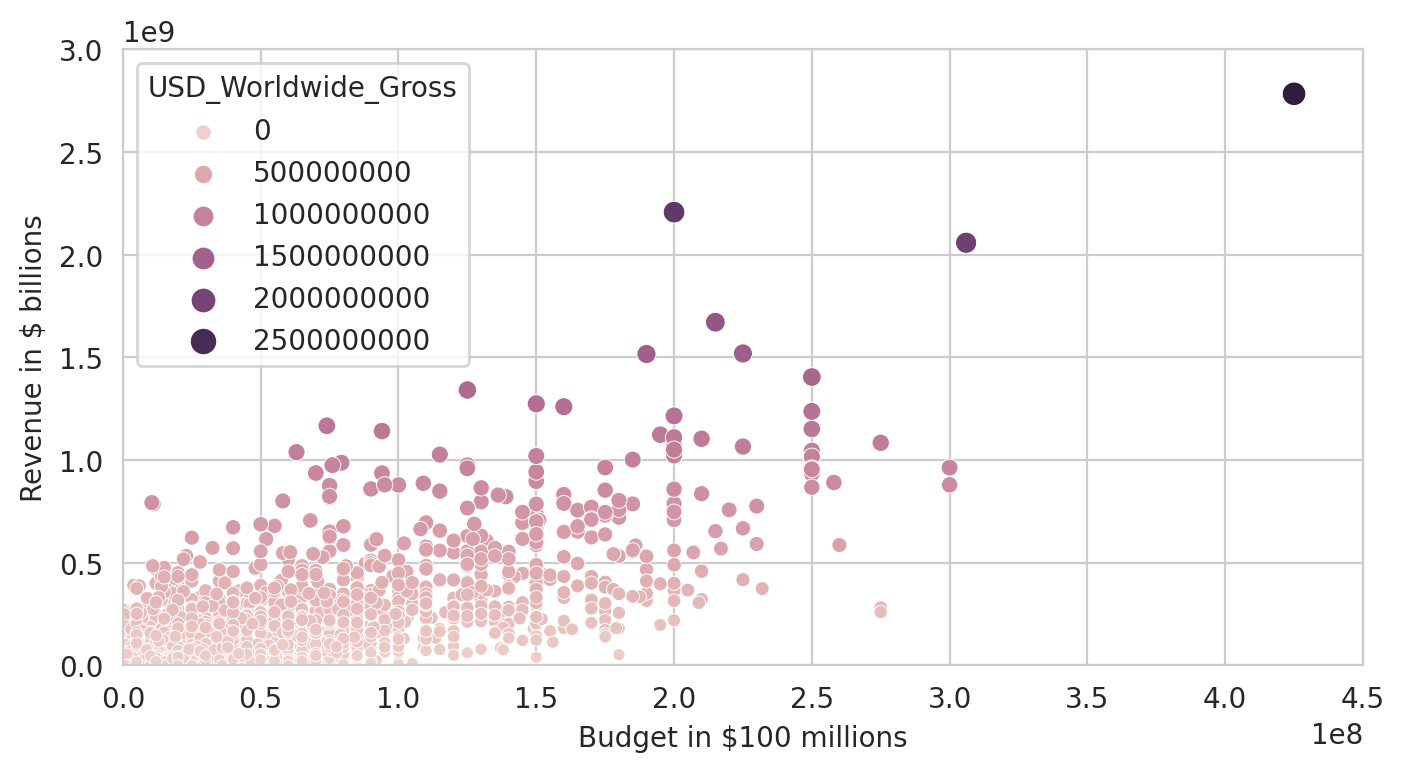

In [82]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



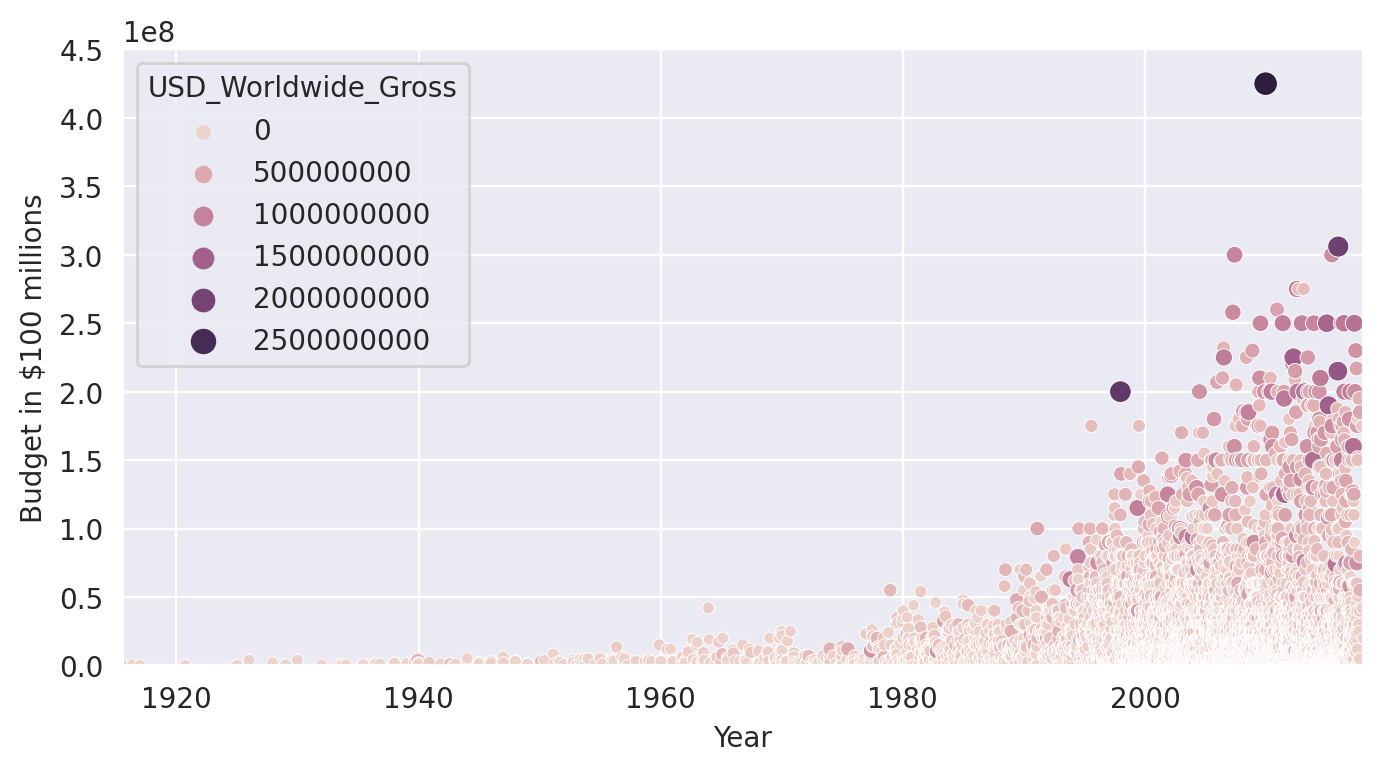

In [83]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [87]:
data_clean['Decade'] = data_clean.Release_Date.dt.year // 10 * 10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [86]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


# Seaborn Regression Plots

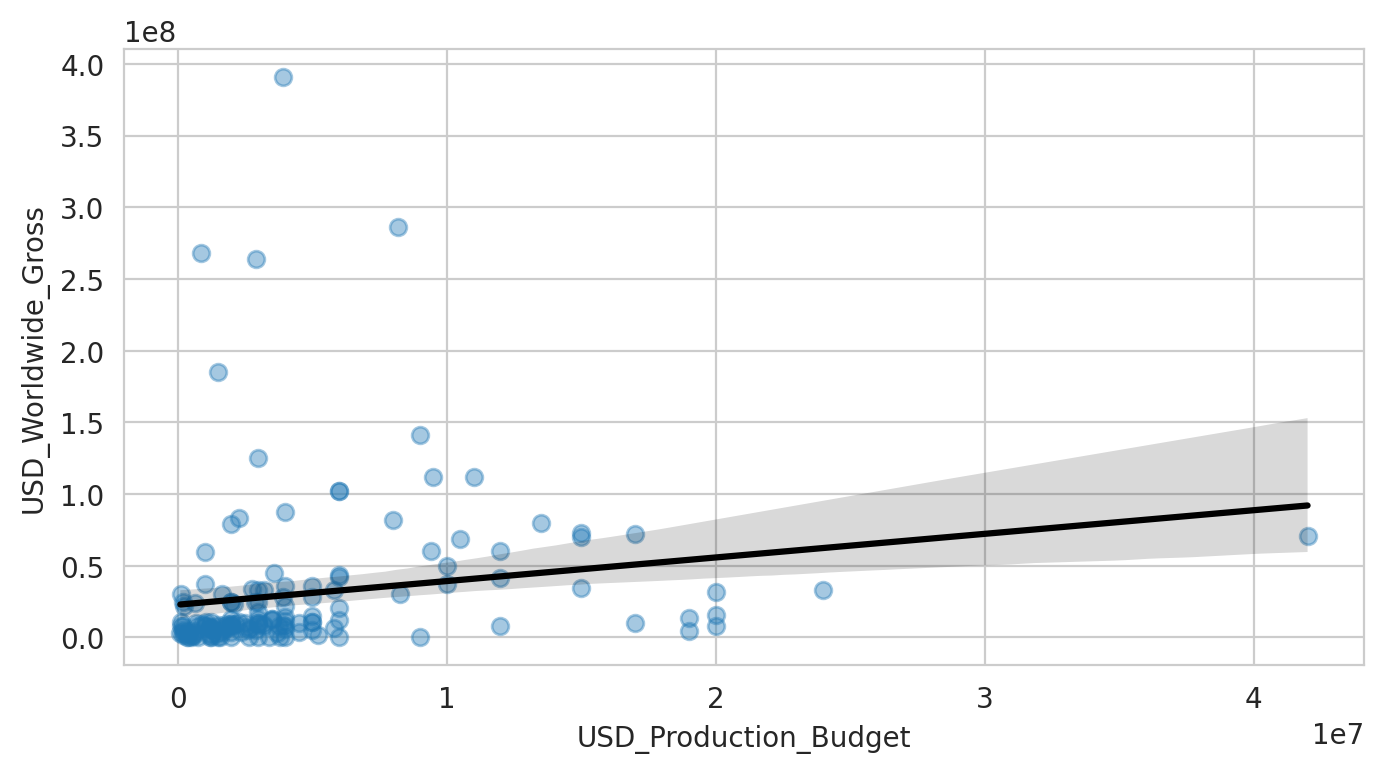

In [89]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

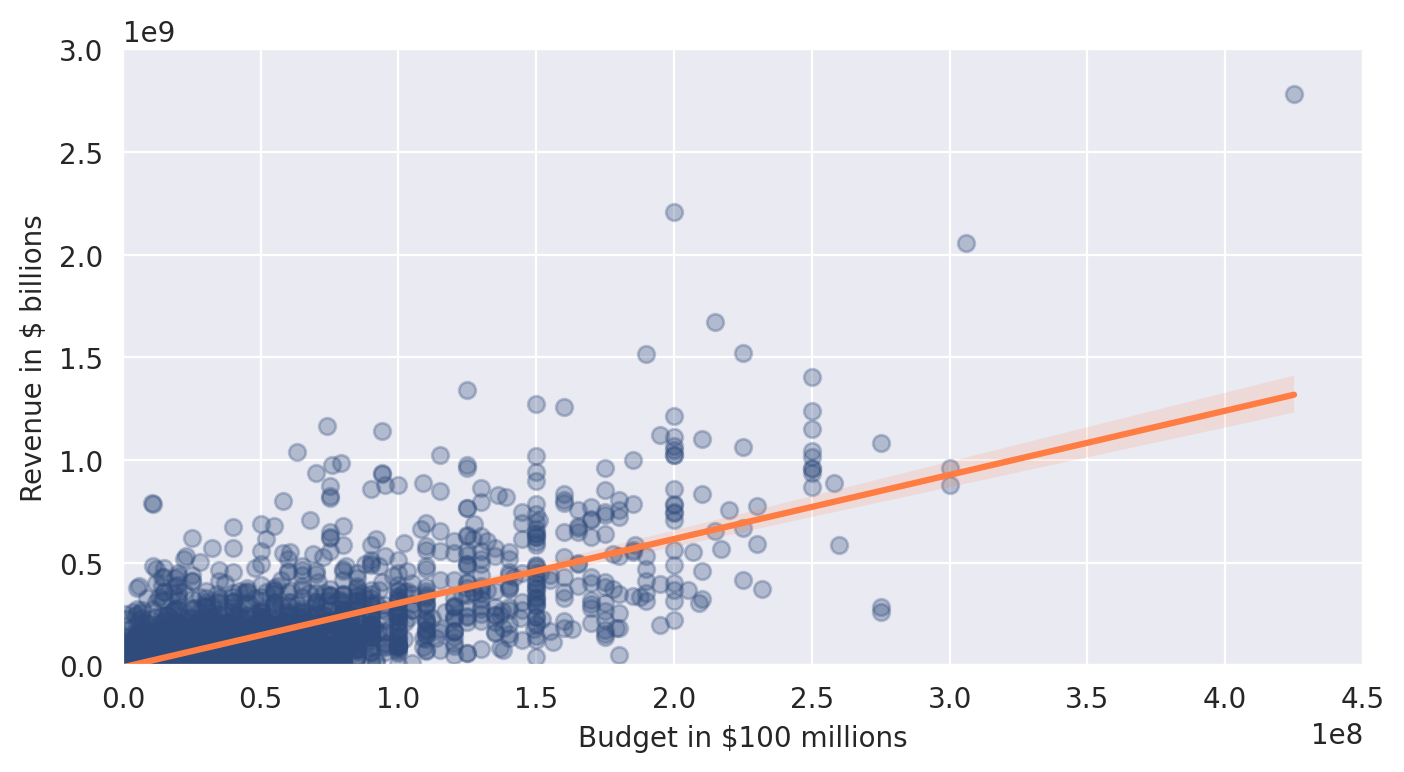

In [90]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [98]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

# R-squared
regression.score(X, y)

[-8650768.00661042]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [99]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

# R-squared
regression.score(X, y)

[22821538.63508039]
[[1.64771314]]


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [100]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
